In [1]:
# # Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
# Display the first few rows of the dataset
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [4]:
# Check for missing values
print(df.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [5]:
# Display summary statistics
print(df.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [6]:
# Data cleaning: Remove duplicates
df = df.drop_duplicates()

C:\Users\chhot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\chhot\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


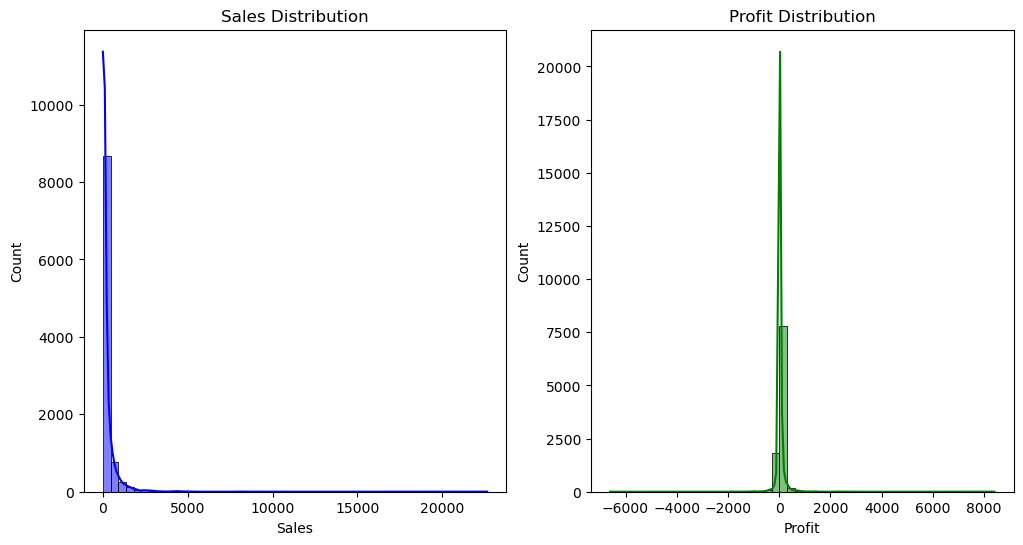

In [7]:
# Data visualization
# 1. Sales and Profit distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], bins=50, kde=True, color='blue')
plt.title('Sales Distribution')
plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], bins=50, kde=True, color='green')
plt.title('Profit Distribution')
plt.show()

C:\Users\chhot\AppData\Local\Temp\ipykernel_21092\3617753811.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)


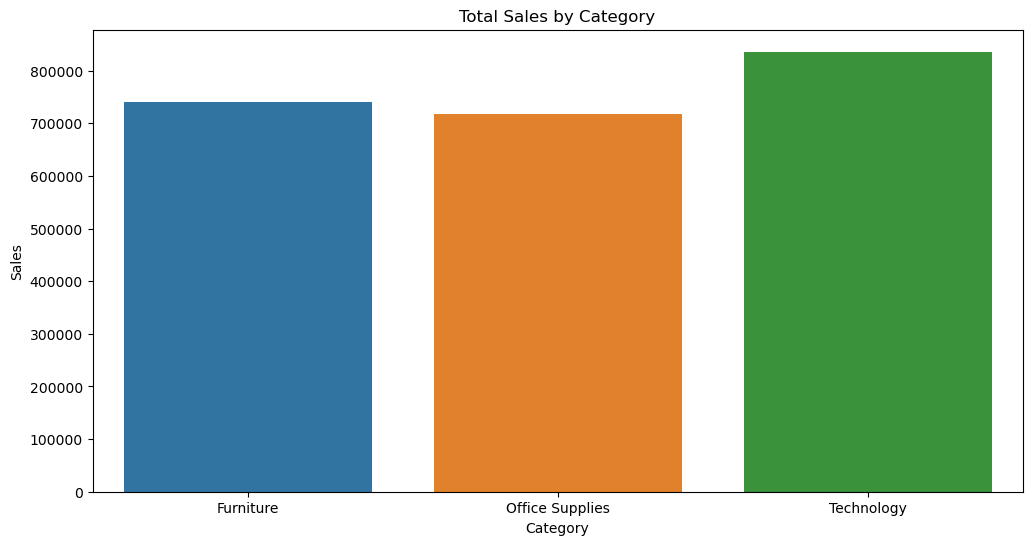

In [8]:
# 2. Sales and Profit by Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Sales', data=df, estimator=sum, ci=None)
plt.title('Total Sales by Category')
plt.show()

C:\Users\chhot\AppData\Local\Temp\ipykernel_21092\812316386.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None)


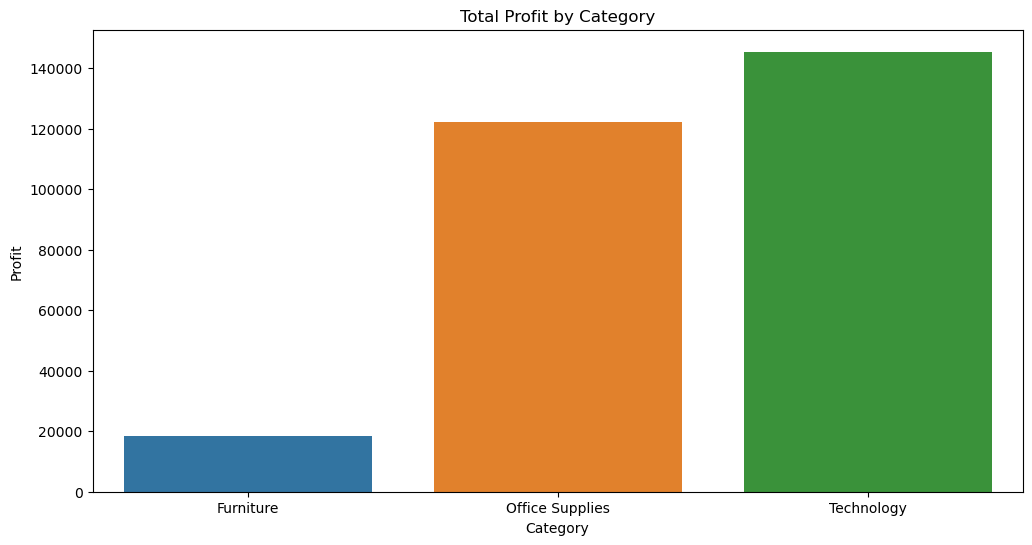

In [9]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Profit', data=df, estimator=sum, ci=None)
plt.title('Total Profit by Category')
plt.show()

C:\Users\chhot\AppData\Local\Temp\ipykernel_21092\537591283.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None)


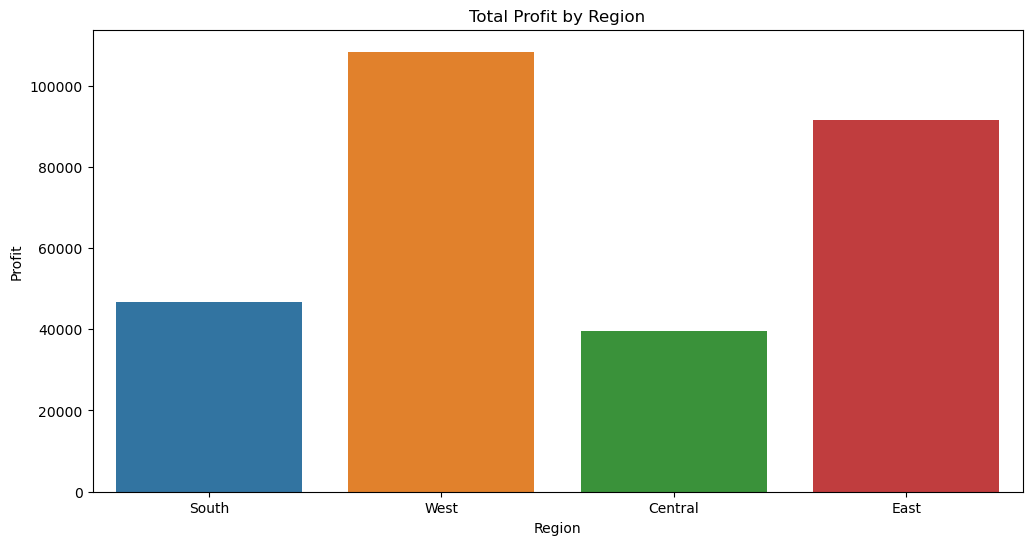

In [12]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Profit', data=df, estimator=sum, ci=None)
plt.title('Total Profit by Region')
plt.show()

C:\Users\chhot\AppData\Local\Temp\ipykernel_21092\1237253836.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Sales', data=df, estimator=sum, ci=None)


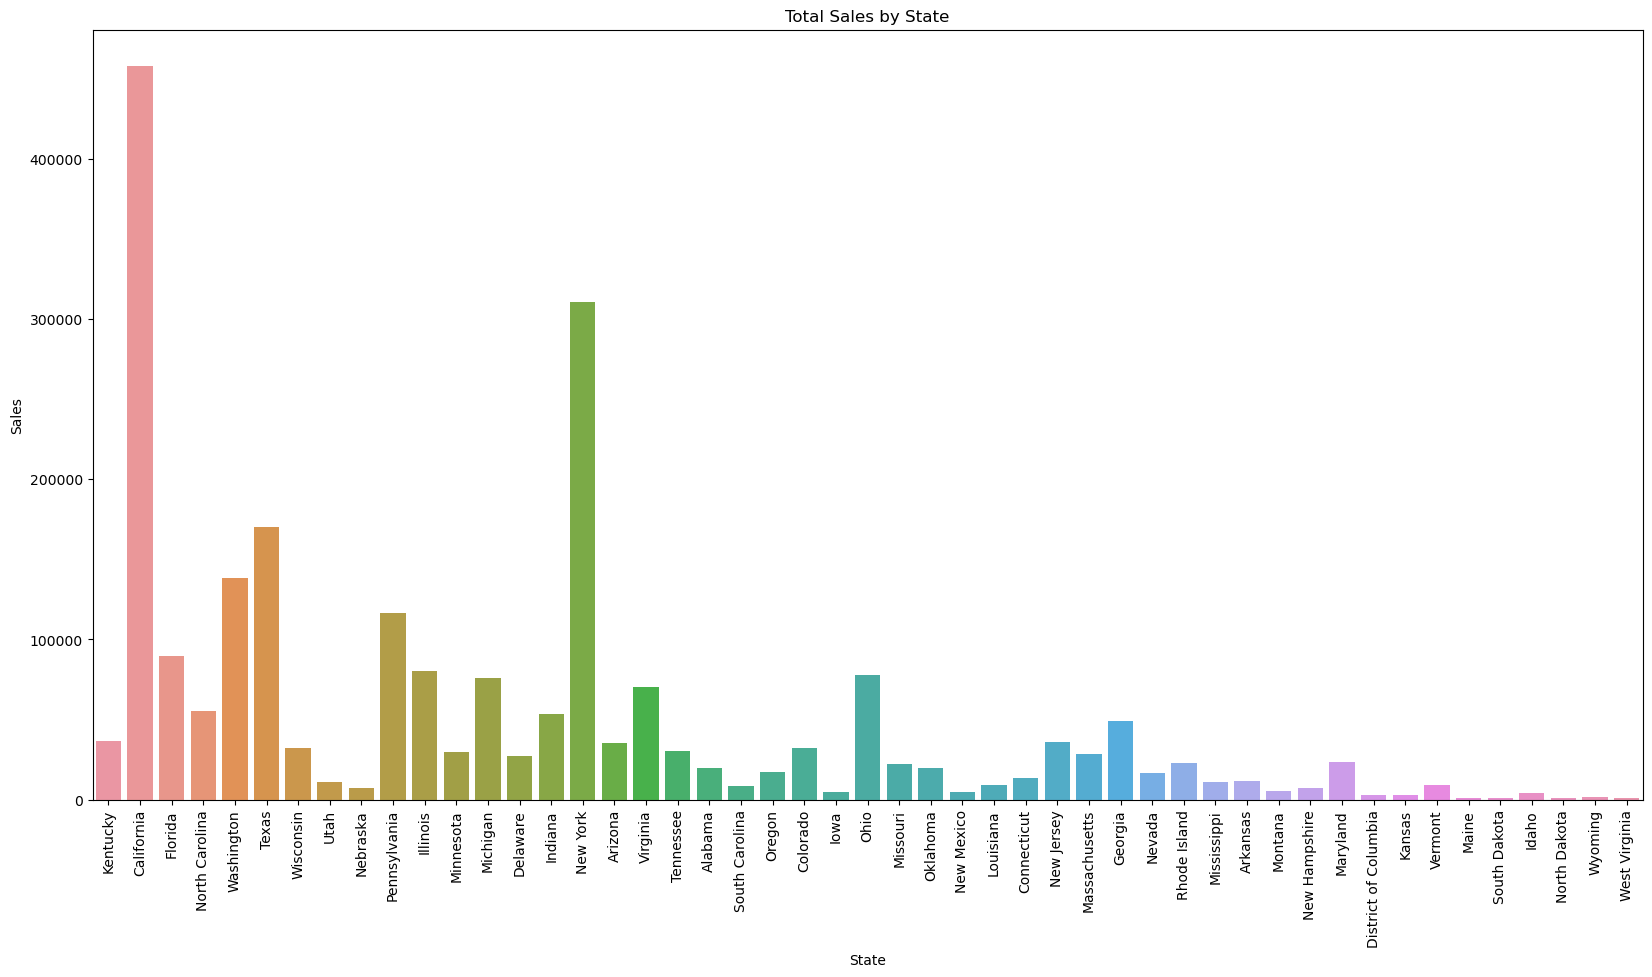

In [13]:
# 4. Sales and Profit by State
plt.figure(figsize=(20, 10))
sns.barplot(x='State', y='Sales', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Total Sales by State')
plt.show()

C:\Users\chhot\AppData\Local\Temp\ipykernel_21092\3092444589.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='State', y='Profit', data=df, estimator=sum, ci=None)


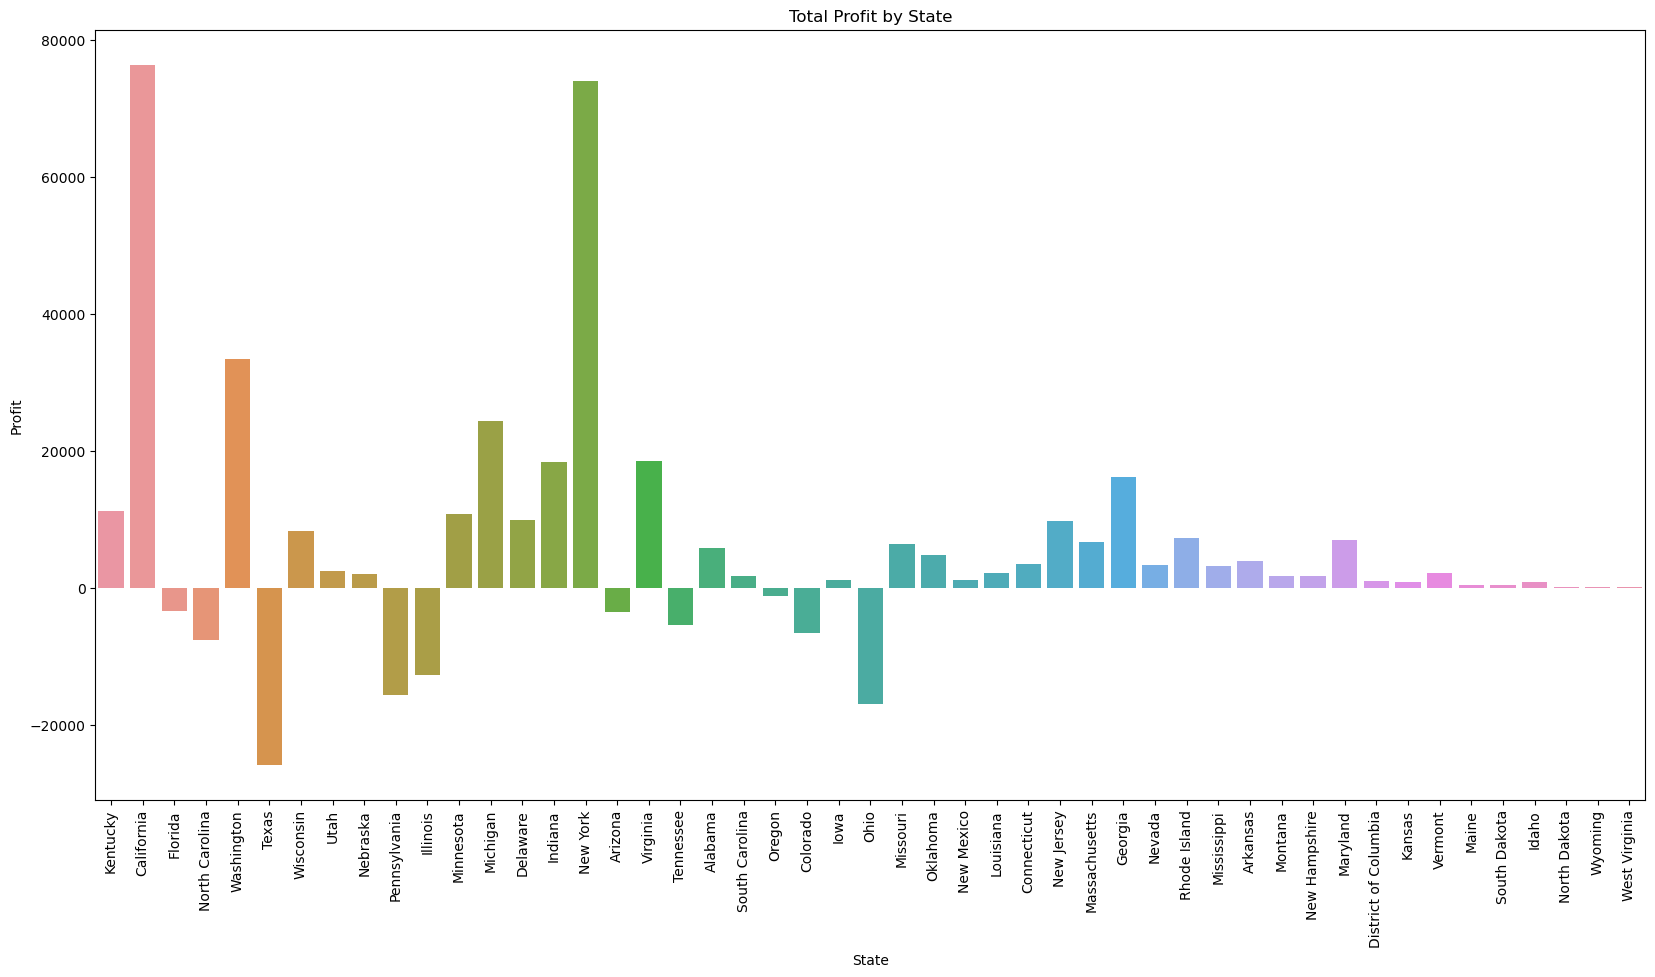

In [14]:
plt.figure(figsize=(20, 10))
sns.barplot(x='State', y='Profit', data=df, estimator=sum, ci=None)
plt.xticks(rotation=90)
plt.title('Total Profit by State')
plt.show()

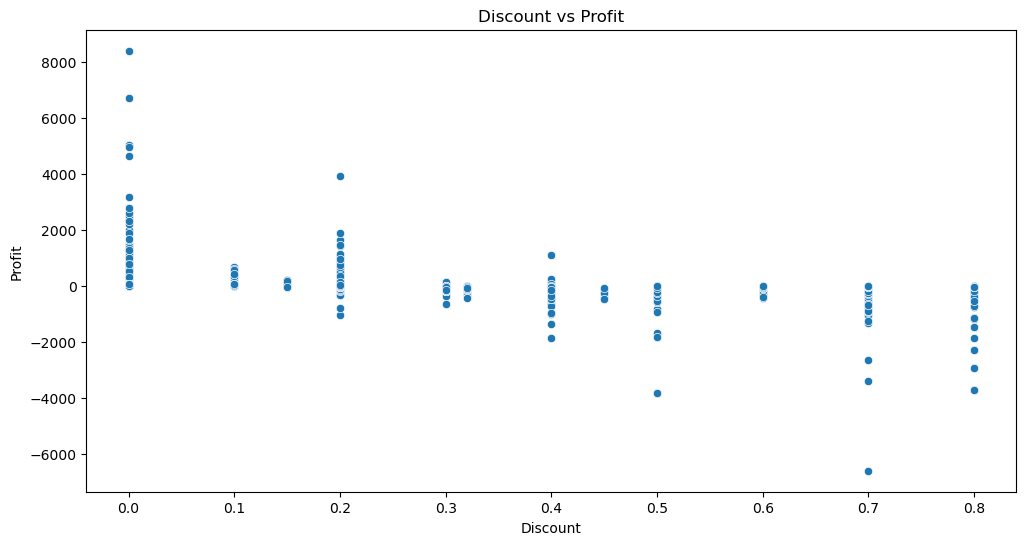

In [15]:
# 5. Discount impact on Profit
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs Profit')
plt.show()

In [16]:
# Identify weak areas for improvement
# Group by Category and Sub-Category to find low profit areas
category_profit = df.groupby(['Category', 'Sub-Category'])['Profit'].sum().reset_index()
low_profit_areas = category_profit[category_profit['Profit'] < 0]
print("Low Profit Areas:")
print(low_profit_areas)

Low Profit Areas:
           Category Sub-Category      Profit
0         Furniture    Bookcases  -3472.5560
3         Furniture       Tables -17725.4811
12  Office Supplies     Supplies  -1189.0995


In [17]:
# Group by State to find low profit states
state_profit = df.groupby('State')['Profit'].sum().reset_index()
low_profit_states = state_profit[state_profit['Profit'] < 0]
print("Low Profit States:")
print(low_profit_states)

Low Profit States:
             State      Profit
1          Arizona  -3427.9246
4         Colorado  -6527.8579
8          Florida  -3399.3017
11        Illinois -12601.6500
31  North Carolina  -7490.9122
33            Ohio -16959.3178
35          Oregon  -1194.0993
36    Pennsylvania -15565.4035
40       Tennessee  -5341.6936
41           Texas -25750.9833


In [18]:
# Group by Region to find low profit regions
region_profit = df.groupby('Region')['Profit'].sum().reset_index()
low_profit_regions = region_profit[region_profit['Profit'] < 0]
print("Low Profit Regions:")
print(low_profit_regions)

Low Profit Regions:
Empty DataFrame
Columns: [Region, Profit]
Index: []
